In [1]:
import json
import pymongo
from math import radians, cos, sin, asin, sqrt
import numpy
import math
from collections import Counter

In [2]:
def haversine(lng1, lat1, lng2, lat2):
    # 将十进制度数转化为弧度
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])
    # haversine公式
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlng / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371  # 地球平均半径，单位为公里
    return c * r * 1000

In [3]:
queryElements={}
client = pymongo.mongo_client.MongoClient("localhost", 27017,username='j122085',password='850605')
# collection = client.rawData.wowprimeipeen
collection = client.rawData.ipeenInfo
ipeendata = list(collection.find(queryElements))
client.close()
ipeendata = [dien for dien in ipeendata if dien['status'] == "正常營業"
                                         and dien['lat'] > 18
                                         and dien['lat'] < 27
                                         and dien['lng'] < 125
                                         and dien['lng'] > 117
                                         and dien['bigadd'] != 0
                                         and dien['smalladd'] != 0
                                         and dien['averagecost']<8000]

for dien in ipeendata:
    dien["id"] = dien.pop("_id")
ipeendata[3]

{'Ncomment': 118,
 'address': '台北市信義區忠孝東路五段10號10樓',
 'averagecost': 1210,
 'bigadd': '台北市',
 'bigstyle': 'buffet自助餐',
 'collecount': 739,
 'comments': ['http://www.ipeen.com.tw/comment/1360256',
  'http://www.ipeen.com.tw/comment/1260569',
  'http://www.ipeen.com.tw/comment/1241048',
  'http://www.ipeen.com.tw/comment/1197122',
  'http://www.ipeen.com.tw/comment/1186946'],
 'id': 95584,
 'ipeenscore': 45,
 'lat': 25.040763368711964,
 'lng': 121.56571445244984,
 'name': '台北W飯店 - the kitchen table 西餐廳',
 'reviewdate': '2016/09/01',
 'smalladd': '信義區',
 'smallstyle': '複合式',
 'status': '正常營業',
 'tele': '0277038887',
 'url': 'http://www.ipeen.com.tw/shop/95584',
 'viewcount': 8987274}

In [4]:
client = pymongo.mongo_client.MongoClient("localhost", 27017,username='j122085',password='850605')
collection = client.rawData.HRdata104
hr104data = list(collection.find(queryElements))
client.close()
hr104data = [dien for dien in hr104data if dien['LAT'] > 18
             and dien['LAT'] < 27
             and dien['SAL_MONTH_LOW'] > 18000
             and dien['SAL_MONTH_LOW'] < 100000
             and dien['SAL_MONTH_HIGH'] > 18000
             and dien['SAL_MONTH_HIGH'] < 200000
             and dien['LON'] < 125
             and dien['LON'] > 117
             and dien['bigadd'] != 0
             and dien['smalladd'] != 0]



for dien in hr104data:
    dien["lat"] = dien.pop("LAT")
    dien["lng"] = dien.pop("LON")
    del dien["_id"]
hr104data[5]

{'APPEAR_DATE': '20180222',
 'DESCRIPTION': '陶板屋台北重慶南店\n誠    徵：大廳計時人員\n工作內容：協助現場顧客服務、外場營運協助等。\n工作時段：(依營運需求彈性排班,工作時間面試詳洽)\n\n◎ 全日班-1名\n(10:30~14:30 及 17:00~22:00)\n◎ 假日班-1名\n(10:30~14:30 及 17:00~22:00) \n◎ 早班-1名\n(10:30~14:30)\n◎ 晚班-1名\n(17:00~22:00)\n\n學/經 歷：高中職以上,具服務熱忱。',
 'J': '4460426b56363f5631323a6344543618638704226443640212121211f382b2625381j52',
 'JOB': '陶板屋台北重慶南店-大廳計時人員',
 'JOBCAT_DESCRIPT': '餐飲服務生',
 'JOB_ADDRESS': '重慶南路一段58號2樓',
 'JOB_ADDR_NO_DESCRIPT': '台北市中正區',
 'NAME': '王品餐飲股份有限公司',
 'SAL_MONTH_HIGH': 26400,
 'SAL_MONTH_LOW': 24800,
 'bigadd': '台北市',
 'bigstyle': '咖啡、簡餐、茶',
 'lat': 25.043903,
 'lng': 121.513078,
 'smalladd': '中正區'}

In [5]:
client = pymongo.mongo_client.MongoClient("localhost", 27017,username='j122085',password='850605')
collection = client.rawData.Nhuman
Nhumandata = list(collection.find(queryElements))
client.close()
for dien in Nhumandata:
    dien["weight"] = int(dien.pop("Nhuman"))
    dien["add"] = dien.pop("_id")
Nhumandata[5]

{'add': '新北市板橋區新興里',
 'bigadd': '新北市',
 'lat': 25.0076421,
 'lng': 121.4549022,
 'smalladd': '板橋區',
 'weight': 3337}

In [6]:
client = pymongo.mongo_client.MongoClient("localhost", 27017,username='j122085',password='850605')
collection = client.rawData.CostPower
CostPowerdata = list(collection.find(queryElements))
client.close()
for dien in CostPowerdata:
    dien["weight"] = int(dien.pop('costPower'))
    dien["add"] = dien.pop("_id")
CostPowerdata[5]

{'add': '臺北市士林區舊佳里',
 'bigadd': '台北市',
 'lat': 25.0973296,
 'lng': 121.5248678,
 'smalladd': '士林區',
 'weight': 68}

In [7]:
client = pymongo.mongo_client.MongoClient("localhost", 27017, username='j122085', password='850605')
collection = client.rawData.wowprimediendata
wowDiensData = list(collection.find({'CloseDate':'None',"lat": {"$gt": 1}}))
wowDiensData=[dien for dien in wowDiensData if "A" not in dien['StoreNo'] and dien['StoreNo'][0]!='3']
wowDiensData[0]

{'Address': '新北市新店區民權路86號2樓',
 'AreaManager': '王至誠',
 'Called': '原燒',
 'CareerName': '原燒事業處',
 'CareerNo': '102',
 'Chef': '郭炳志',
 'CloseDate': 'None',
 'CodeId': 'F',
 'CorporationId': '27492204',
 'Corporation_ch': '原燒新店民權分公司',
 'CreateDate': '2018-02-02 08:46:12.987000',
 'ItemName': '百貨點',
 'Manager': '吳憲政',
 'Phone': '02-22191613',
 'PlaceNo': '33',
 'StoreName': '新店民權',
 'StoreNo': '10202',
 '_id': '10202',
 'avgDailyCustomer': 147,
 'avgDailyMeal': 122,
 'avgDailyNet': 94682,
 'bigadd': '新北市',
 'income': '5000000',
 'lat': 24.9832568,
 'lng': 121.5370956,
 'smalladd': '新店區'}

In [8]:
set([i['Called'] for i in wowDiensData])

{'CooK BEEF!',
 'hot 7',
 'ita義塔',
 '乍牛',
 '其他事業處',
 '原燒',
 '品田牧場',
 '夏慕尼',
 '沐越',
 '王品',
 '石二鍋',
 '聚',
 '舒果',
 '舒果新加坡',
 '莆田',
 '蔬果截切配送中心',
 '藝奇',
 '陶板屋',
 '青花驕',
 '麻佬大',
 'ＴＡＳＴｙ'}

In [9]:
import numpy
import math
from collections import Counter
x=[]
queryDien=input("請輸入品牌名稱:")
radius=int(input("半徑範圍(公尺):"))
if queryDien!="":
    wowData=[i for i in wowDiensData if i['Called']==queryDien]
else:
    wowData=wowDiensData
    queryDien="全品牌"
print("有{}筆資料要分析".format(len(wowData)))
n=0
for wowDein in wowData:
    n+=1
    if n%30==0:
        print("已完成{}項分析".format(n))
    y={}
    y['店代號']=wowDein["_id"]
    y["事業處"]=wowDein['Called']
    y["分店名"]=wowDein['StoreName']
    y["地址"]=wowDein['Address']
    y['電話']=wowDein['Phone']
#     y["區管理者"]=wowDein['AreaManager']
#     y["廚師"]=wowDein['Chef']
    try:
        y['每日均_營收淨額(ADS)']=wowDein['avgDailyNet']
        y['每日均_顧客量(ADGC)']=wowDein['avgDailyCustomer']
#         y['每日均_客量']=wowDein['avgDailyMeal']
    except:
        pass
    y["半徑範圍(公尺)"]=radius
    
    
    dienCostPower = round(numpy.mean([dien['weight'] for dien in CostPowerdata if haversine(lng1=dien["lng"],
                                                                 lat1=dien["lat"],
                                                                 lng2=wowDein["lng"],
                                                                 lat2=wowDein["lat"]) <= radius]))
    if not math.isnan(dienCostPower):
        y["消費力"]=dienCostPower
        
    y["消費力筆數"]=len([dien['weight'] for dien in CostPowerdata if haversine(lng1=dien["lng"],
                                                                 lat1=dien["lat"],
                                                                 lng2=wowDein["lng"],
                                                                 lat2=wowDein["lat"]) <= radius])
    
    
    dienHuman = sum([dien['weight'] for dien in Nhumandata if haversine(lng1=dien["lng"],
                                                                 lat1=dien["lat"],
                                                                 lng2=wowDein["lng"],
                                                                 lat2=wowDein["lat"]) <= radius])
    y['人口數']=dienHuman 
    
    
    
    avgSalary = round(numpy.mean([dien['SAL_MONTH_LOW']*1/3+dien['SAL_MONTH_HIGH']*2/3 for dien in hr104data if haversine(lng1=dien["lng"],
                                                                 lat1=dien["lat"],
                                                                 lng2=wowDein["lng"],
                                                                 lat2=wowDein["lat"]) <= radius]))
    if not math.isnan(avgSalary):
        y['餐飲業平均薪資(2/3最低+1/3最高)']=avgSalary 
        
    y['餐飲業徵才筆數']=len([dien['SAL_MONTH_LOW']*1/3+dien['SAL_MONTH_HIGH']*2/3 for dien in hr104data if haversine(lng1=dien["lng"],
                                                                 lat1=dien["lat"],
                                                                 lng2=wowDein["lng"],
                                                                 lat2=wowDein["lat"]) <= radius])
    
    
    avgCost = round(numpy.mean([dien['averagecost'] for dien in ipeendata if haversine(lng1=dien["lng"],
                                                                 lat1=dien["lat"],
                                                                 lng2=wowDein["lng"],
                                                                 lat2=wowDein["lat"]) <= radius]))
    if not math.isnan(avgCost):
        y['餐飲業平均消費']=avgCost
    
    try:
        mostStyle=Counter([dien['bigstyle'] for dien in ipeendata if haversine(lng1=dien["lng"],
                                                                     lat1=dien["lat"],
                                                                     lng2=wowDein["lng"],
                                                                     lat2=wowDein["lat"]) <= radius]).most_common(1)[0][0]
    except:
        mostStyle=""
    y['最多品類']=mostStyle
    
    
    
    x.append(y)
    
    

請輸入品牌名稱:
半徑範圍(公尺):2000
有281筆資料要分析
已完成30項分析


D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


已完成60項分析
已完成90項分析
已完成120項分析
已完成150項分析
已完成180項分析
已完成210項分析
已完成240項分析
已完成270項分析


In [15]:
import pandas as pd
df = pd.DataFrame(x)
df=df.reindex(columns=['店代號','事業處','分店名','地址','電話','半徑範圍(公尺)','每日均_營收淨額','每日均_顧客量','每日均_客量',
                       '消費力','消費力筆數','人口數','餐飲業平均薪資(2/3最低+1/3最高)','餐飲業徵才筆數','餐飲業平均消費','最多品類']) #,'區管理者',"廚師"
writer = pd.ExcelWriter('../data/'+queryDien+'.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()
print("儲存完畢")

儲存完畢


In [65]:
x[:5]

[{'事業處': '原燒',
  '分店名': '新店民權',
  '半徑範圍(公尺)': 2000,
  '地址': '新北市新店區民權路86號2樓',
  '平均薪資': 29884.0,
  '店代號': '10202',
  '廚師': '郭炳志',
  '徵才筆數': 103,
  '最多品類': '中式料理',
  '消費力': 49.0,
  '消費力筆數': 27,
  '管理者': '王至誠',
  '範圍人口數': 243950,
  '電話': '02-22191613',
  '餐飲業平均消費': 121.0},
 {'事業處': '原燒',
  '分店名': '台中市政北',
  '半徑範圍(公尺)': 2000,
  '地址': '台中市西屯區市政北一路一號2樓',
  '平均薪資': 28599.0,
  '店代號': '10203',
  '廚師': '莊鎮源',
  '徵才筆數': 568,
  '最多品類': '咖啡、簡餐、茶',
  '消費力': 79.0,
  '消費力筆數': 33,
  '管理者': '蕭明泰',
  '範圍人口數': 223146,
  '電話': '04-22586886',
  '餐飲業平均消費': 163.0},
 {'事業處': '原燒',
  '分店名': '板橋館前東',
  '半徑範圍(公尺)': 2000,
  '地址': '新北市板橋區館前東路96號1樓',
  '平均薪資': 29591.0,
  '店代號': '10204',
  '廚師': '鄭伊浚',
  '徵才筆數': 240,
  '最多品類': '小吃',
  '消費力': 54.0,
  '消費力筆數': 48,
  '管理者': '王至誠',
  '範圍人口數': 404374,
  '電話': '02-29598558',
  '餐飲業平均消費': 136.0},
 {'事業處': '原燒',
  '分店名': '高雄中山',
  '半徑範圍(公尺)': 2000,
  '地址': '高雄市中山二路410號1、2樓',
  '平均薪資': 27994.0,
  '店代號': '10205',
  '廚師': '黃文杰',
  '徵才筆數': 214,
  '最多品類': '中式料理',
  '消費力': 52.0,


# 直接存進mongo內

In [47]:
import json
import pymongo
from pymongo import UpdateOne
import numpy
import math
from math import radians, cos, sin, asin, sqrt
from collections import Counter
import time
import sys
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.message import EmailMessage
import smtplib

def haversine(lng1, lat1, lng2, lat2):
    # 将十进制度数转化为弧度
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])
    # haversine公式
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlng / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371  # 地球平均半径，单位为公里
    return c * r * 1000


b=time.time()
def mailTo(title,mailAdds,message,whoSend='AutoAddInsurance'):
    msg = MIMEMultipart()    
    sender = whoSend
    subject = title
    body = message
    msg['From'] = sender
    msg['To'] = ','.join(mailAdds)
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))
    text=msg.as_string()
    #print text
    # Send the message via our SMTP server
    s = smtplib.SMTP('192.168.2.1',25)
    s.sendmail(sender,mailAdds, text)
    s.quit()  

try:
    ######################################################IPEEN
    b=time.time()
    queryElements = {}
    client = pymongo.mongo_client.MongoClient("localhost", 27017, username='j122085', password='850605')
    # collection = client.rawData.wowprimeipeen
    collection = client.rawData.ipeenInfo
    ipeendata = list(collection.find(queryElements))
    ipeendata = [dien for dien in ipeendata if dien['status'] == "正常營業"
                 and dien['lat'] > 18
                 and dien['lat'] < 27
                 and dien['lng'] < 125
                 and dien['lng'] > 117
                 and dien['bigadd'] != 0
                 and dien['smalladd'] != 0
                 and dien['averagecost'] < 8000]

    for dien in ipeendata:
        dien["id"] = dien.pop("_id")
    ######################################################IPEEN
    ######################################################104
    collection = client.rawData.HRdata104
    hr104data = list(collection.find(queryElements))
    hr104data = [dien for dien in hr104data if dien['LAT'] > 18
                 and dien['LAT'] < 27
                 and dien['SAL_MONTH_LOW'] > 18000
                 and dien['SAL_MONTH_LOW'] < 100000
                 and dien['SAL_MONTH_HIGH'] > 18000
                 and dien['SAL_MONTH_HIGH'] < 200000
                 and dien['LON'] < 125
                 and dien['LON'] > 117
                 and dien['bigadd'] != 0
                 and dien['smalladd'] != 0]

    for dien in hr104data:
        dien["lat"] = dien.pop("LAT")
        dien["lng"] = dien.pop("LON")
        del dien["_id"]
    ######################################################104
    ######################################################Nhuman
    collection = client.rawData.Nhuman
    Nhumandata = list(collection.find(queryElements))
    for dien in Nhumandata:
        dien["weight"] = int(dien.pop("Nhuman"))
        dien["add"] = dien.pop("_id")
    ######################################################Nhuman
    ######################################################CostPower
    collection = client.rawData.CostPower
    CostPowerdata = list(collection.find(queryElements))
    for dien in CostPowerdata:
        dien["weight"] = int(dien.pop('costPower'))
        dien["add"] = dien.pop("_id")
    ######################################################CostPower

    ######################################################Wow
    collection = client.rawData.wowprimediendata
    wowDiensData = list(collection.find({'CloseDate': 'None', "lat": {"$gt": 1}}))
    wowDiensData = [dien for dien in wowDiensData if "A" not in dien['StoreNo'] and dien['StoreNo'][0] != '3']

    x = []
    queryDien = ""#input("請輸入品牌名稱:")
    radius = 2000#int(input("半徑範圍(公尺):"))
    if queryDien != "":
        wowDiensData = [i for i in wowDiensData if i['Called'] == queryDien]
    else:
        queryDien = "全品牌"
    print("有{}筆資料要分析".format(len(wowData)))
    n = 0
    for wowDien in wowDiensData:
        n += 1
        if n % 15 == 0:
            print("已完成{}項分析".format(n))
        wowDien["areaRadius_Analyze"] = radius
        dienCostPower = round(numpy.mean([dien['weight'] for dien in CostPowerdata if haversine(lng1=dien["lng"],
                                                                                                lat1=dien["lat"],
                                                                                                lng2=wowDien["lng"],
                                                                                                lat2=wowDien[
                                                                                                    "lat"]) <= radius and 'weight' in dien]))

        if not math.isnan(dienCostPower):
            wowDien["costPower_Analyze"] = dienCostPower
        wowDien["NcostData_Analyze"] = len([dien['weight'] for dien in CostPowerdata if haversine(lng1=dien["lng"],
                                                                                lat1=dien["lat"],
                                                                                lng2=wowDien["lng"],
                                                                                lat2=wowDien["lat"]) <= radius and 'weight' in dien])

        dienHuman = sum([dien['weight'] for dien in Nhumandata if haversine(lng1=dien["lng"],
                                                                            lat1=dien["lat"],
                                                                            lng2=wowDien["lng"],
                                                                            lat2=wowDien["lat"]) <= radius and 'weight' in dien])
        wowDien['Nhuman_Analyze'] = dienHuman

        avgSalary = round(numpy.mean(
            [dien['SAL_MONTH_LOW'] * 1 / 3 + dien['SAL_MONTH_HIGH'] * 2 / 3 for dien in hr104data if
             haversine(lng1=dien["lng"],
                       lat1=dien["lat"],
                       lng2=wowDien["lng"],
                       lat2=wowDien["lat"]) <= radius and 'SAL_MONTH_HIGH' in dien and 'SAL_MONTH_LOW' in dien]))
        if not math.isnan(avgSalary):
            wowDien['avgSalary_Analyze'] = avgSalary

        wowDien['Njob_Analyze'] = len([dien['SAL_MONTH_LOW'] * 1 / 3 + dien['SAL_MONTH_HIGH'] * 2 / 3 for dien in hr104data if
                            haversine(lng1=dien["lng"],
                                      lat1=dien["lat"],
                                      lng2=wowDien["lng"],
                                      lat2=wowDien["lat"]) <= radius and 'SAL_MONTH_HIGH' in dien  and 'SAL_MONTH_LOW' in dien])

        avgCost = round(numpy.mean([dien['averagecost'] for dien in ipeendata if haversine(lng1=dien["lng"],
                                                                                           lat1=dien["lat"],
                                                                                           lng2=wowDien["lng"],
                                                                                           lat2=wowDien[
                                                                                               "lat"]) <= radius and 'averagecost' in dien]))
        if not math.isnan(avgCost):
            wowDien['avgCost_Analyze'] = avgCost

        try:
            mostStyle = Counter([dien['bigstyle'] for dien in ipeendata if haversine(lng1=dien["lng"],
                                                                                     lat1=dien["lat"],
                                                                                     lng2=wowDien["lng"],
                                                                                     lat2=wowDien[
                                                                                         "lat"]) <= radius and 'bigstyle' in dien]).most_common(
                1)[0][0]
        except:
            mostStyle = ""
        wowDien['mostStyle_Analyze'] = mostStyle
        e = time.time()
    print(e-b)


    ids=[data.pop("_id") for data in wowDiensData]
    operations=[UpdateOne({"_id":idn},{'$set':data},upsert=True) for idn ,data in zip(ids,wowDiensData)]
    try:
        collection.bulk_write(operations ,ordered=False)
    except:
        print(e)

    alldata=list(collection.find({}))

    client.close()
    
    mailTo(title="analyzeWowDataSuccess",mailAdds=["andy.yuan@wowprime.com"],message="分析完畢_耗時{}秒".format(e-b),whoSend='analyzeWowData')
except:
    errorMsg=str(e)+"出錯位置:"+str(sys.exc_info()[2].tb_lineno)
    mailTo(title="analyzeWowDataSuccess",mailAdds=["andy.yuan@wowprime.com"],message=errorMsg,whoSend='analyzeWowData')

有281筆資料要分析
已完成15項分析
已完成30項分析


D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


已完成45項分析
已完成60項分析
已完成75項分析
已完成90項分析
已完成105項分析
已完成120項分析
已完成135項分析
已完成150項分析
已完成165項分析
已完成180項分析
已完成195項分析
已完成210項分析
已完成225項分析
已完成240項分析
已完成255項分析
已完成270項分析
276.8906865119934


# 以下試玩回歸

In [68]:
import pymongo
client = pymongo.mongo_client.MongoClient("localhost", 27017,username='j122085',password='850605')
collections=client.rawData.wowprimediendata
data=list(collections.find({}))

In [112]:
print(set([i['Called'] for i in data]))
data[2]

{'其他事業處', '王品', 'CooK BEEF!', '聚', '新創事業處', '大陸LAMU 慕', '舒果', 'ita義塔', '曼咖啡', '石二鍋', '美國原燒', '大陸王品', '陶板屋', '原燒', '大陸西堤', 'ＴＡＳＴｙ', '大陸蜀三味.川菜', '舒果新加坡', '莆田', '夏慕尼', '大陸花隱', '乍牛', '麻佬大', 'None', 'hot 7', 'Ａ＋國中', '打椒道', '蔬果截切配送中心', '大陸三哇造面', '沐越', '品田牧場', '大陸石二鍋', '大陸鵝夫人', '泰國陶板屋', '青花驕', '大陸舞漁', 'P.B', 'Ａ＋國小', '１９味', '藝奇'}


{'Address': '台中市西屯區市政北一路一號2樓',
 'AreaManager': '蕭明泰',
 'Called': '原燒',
 'CareerName': '原燒事業處',
 'CareerNo': '102',
 'Chef': '莊鎮源',
 'CloseDate': 'None',
 'CodeId': 'B',
 'CorporationId': '38876430',
 'Corporation_ch': '原燒台中市政北店',
 'CreateDate': '2018-02-02 08:46:50.917000',
 'ItemName': '百貨點',
 'Manager': '吳憲政',
 'NcostData_Analyze': 33,
 'Nhuman_Analyze': 223146,
 'Njob_Analyze': 568,
 'Phone': '04-22586886',
 'PlaceNo': '49',
 'StoreName': '台中市政北',
 'StoreNo': '10203',
 '_id': '10203',
 'areaRadius_Analyze': 2000,
 'avgCost_Analyze': 163.0,
 'avgDailyCustomer': 138,
 'avgDailyMeal': 114,
 'avgDailyNet': 87378,
 'avgSalary_Analyze': 28599.0,
 'bigadd': '台中市',
 'costPower_Analyze': 79.0,
 'lastYearRevenue': 34465184,
 'lat': 24.1568519,
 'lng': 120.6464849,
 'mostStyle_Analyze': '咖啡、簡餐、茶',
 'smalladd': '西屯區市'}

In [113]:
yearRevenueList=[i['lastYearRevenue'] for i in data if 'lastYearRevenue' in i 
                 and 'costPower_Analyze' in i 
                 and i['NcostData_Analyze']>10
                 and i['Called']=='石二鍋']
costPowerList=[i['costPower_Analyze'] for i in data if 'lastYearRevenue' in i 
               and 'costPower_Analyze' in i 
               and i['NcostData_Analyze']>10
               and i['Called']=='石二鍋']

In [116]:
import numpy as np
data_X=np.array(yearRevenueList)/10000
data_Y=np.array(costPowerList)
print(data_X)
print(data_Y)
print(len(data_X))

[1967.8365 1770.1856 1654.087  1899.2425 2351.6234 1691.1979 2014.4562
 2679.4648 2017.5229 2648.606  2341.0045 2004.6458 2167.2469 2865.3033
 1677.0219 2800.1611 2358.8431 2533.151  2488.4142 1840.4056 4264.0615
 2673.1454 1696.074  2422.6059 3280.49   2244.6191 3446.4834 3070.1907
 3676.9368 3011.6978 3874.6869 2582.7194 3530.3675 3048.0367 3107.6381
 2559.9763  901.1012 1071.6078  394.1573  208.7314]
[49. 72. 79. 56. 56. 53. 42. 62. 54. 74. 70. 46. 54. 71. 65. 55. 47. 65.
 50. 63. 63. 51. 61. 51. 57. 55. 80. 43. 54. 58. 56. 57. 52. 59. 53. 53.
 51. 54. 57. 51.]
40


In [88]:
from sympy import *
num = len(data_X)
def linear_regression(X, Y):
    a, b = symbols('a b')
    residual = 0
    #residualSum 求殘差

    for i in range(num):
        residual += (Y[i] - (a * X[i] + b)) ** 2

    #展開觀看方程式內容

    print (expand(residual))
    #對a微分

    f1 = diff(residual, a)
    #對b微分

    f2 = diff(residual, b)
    print (f1)
    print (f2)
    #求聯立方程式的解

    res = solve([f1, f2], [a, b])
    return res[a], res[b]

a, b = linear_regression(data_X, data_Y)

338681220738817876*a**2 + 16509122932*a*b - 970929454388.0*a + 250*b**2 - 29406.0*b + 889275.0
677362441477635752*a + 16509122932*b - 970929454388.0
16509122932*a + 500*b - 29406.0


In [91]:
b

58.8132690736243

In [92]:
a

-3.84355253007993e-11

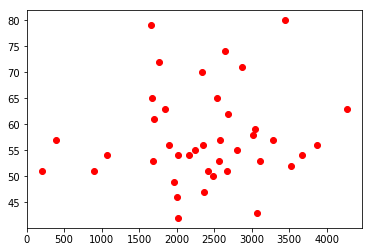

In [117]:
import matplotlib.pyplot as plt
plt.plot(data_X, data_Y, 'ro')
plt.show()

In [ ]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from lightning.classification import CDClassifier

# Load News20 dataset from scikit-learn.
bunch = fetch_20newsgroups_vectorized(subset="all")
X = bunch.data
y = bunch.target

# Set classifier options.
clf = CDClassifier(penalty="l1/l2",
                   loss="squared_hinge",
                   multiclass=True,
                   max_iter=20,
                   alpha=1e-4,
                   C=1.0 / X.shape[0],
                   tol=1e-3)

# Train the model.
clf.fit(X, y)

# Accuracy
print(clf.score(X, y))

# Percentage of selected features
print(clf.n_nonzero(percentage=True))

In [119]:
!pip install sklearn-contrib-lightning

  Running setup.py bdist_wheel for sklearn-contrib-lightning: started
  Running setup.py bdist_wheel for sklearn-contrib-lightning: finished with status 'error'
  Complete output from command D:\anaconda\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\ANDY~1.YUA\\AppData\\Local\\Temp\\pip-build-ep_6po4v\\sklearn-contrib-lightning\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\ANDY~1.YUA\AppData\Local\Temp\tmp83e1vs40pip-wheel- --python-tag cp36:
  Appending lightning.impl.datasets configuration to lightning.impl
  Ignoring attempt to set 'name' (from 'lightning.impl' to 'lightning.impl.datasets')
  Appending lightning.impl.randomkit.tests configuration to lightning.impl.randomkit
  Ignoring attempt to set 'name' (from 'lightning.impl.randomkit' to 'lightning.impl.randomkit.tests')
  Appending lightning.impl.randomkit configuration to lightning.impl
  I

  Failed building wheel for sklearn-contrib-lightning
Command "D:\anaconda\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\ANDY~1.YUA\\AppData\\Local\\Temp\\pip-build-ep_6po4v\\sklearn-contrib-lightning\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\ANDY~1.YUA\AppData\Local\Temp\pip-q6l6kchv-record\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\ANDY~1.YUA\AppData\Local\Temp\pip-build-ep_6po4v\sklearn-contrib-lightning\
